# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

names = []
hemis = []
latis = []
longis = []
temps = []
humids = []
clouds = []
winds = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        print(json.dumps(response, indent=4, sort_keys=True))
        names.append(response["name"])
        if response["coord"]["lat"] >= 0:
            hemis.append("northern")
        else:
            hemis.append("southern")
        latis.append(response["coord"]["lat"])
        longis.append(response["coord"]["lon"])
        temps.append(response["main"]["temp"])
        humids.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
    except:
        print("We dont got that")
        pass


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 69.4865,
        "lon": 88.3972
    },
    "dt": 1612900223,
    "id": 1490256,
    "main": {
        "feels_like": -19.25,
        "grnd_level": 986,
        "humidity": 88,
        "pressure": 995,
        "sea_level": 995,
        "temp": -11.09,
        "temp_max": -11.09,
        "temp_min": -11.09
    },
    "name": "Talnakh",
    "sys": {
        "country": "RU",
        "sunrise": 1612926021,
        "sunset": 1612950064
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 288,
        "speed": 2.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 69.4541,
        "lon": -133.0374
    },
    "dt": 1

{
    "cod": "404",
    "message": "city not found"
}
We dont got that
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -17.397,
        "lon": 32.2268
    },
    "dt": 1612900225,
    "id": 884927,
    "main": {
        "feels_like": 71.44,
        "grnd_level": 872,
        "humidity": 98,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 66.49,
        "temp_max": 66.49,
        "temp_min": 66.49
    },
    "name": "Mutoko",
    "rain": {
        "1h": 0.14
    },
    "sys": {
        "country": "ZW",
        "sunrise": 1612842179,
        "sunset": 1612888065
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 337,
        "speed": 1.3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 65.3667,
        "lon": 64.6667
    },
    "dt": 1612900226,
    "id": 1498161,
    "main": {
        "feels_like": -33.32,
        "grnd_level": 1007,
        "humidity": 82,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": -24.66,
        "temp_max": -24.66,
        "temp_min": -24.66
    },
    "name": "Muzhi",
    "sys": {
        "country": "RU",
        "sunrise": 1612929684,
        "sunset": 1612957792
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 251,
        "speed": 2.98
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 38
    },
    "cod": 200,
    "coord": {
        "lat": 70.6333,
        "lon": 147.9167
    },
    "dt": 1612899887

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -21.2,
        "lon": -175.2
    },
    "dt": 1612900227,
    "id": 4032243,
    "main": {
        "feels_like": 77.95,
        "humidity": 83,
        "pressure": 1006,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Vaini",
    "rain": {
        "1h": 2
    },
    "sys": {
        "country": "TO",
        "id": 7285,
        "sunrise": 1612978141,
        "sunset": 1613024472,
        "type": 1
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 10,
        "gust": 36.82,
        "speed": 23.02
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -22.9661,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 62.456,
        "lon": -114.3525
    },
    "dt": 1612899806,
    "id": 6185377,
    "main": {
        "feels_like": -29.42,
        "humidity": 70,
        "pressure": 1031,
        "temp": -12.19,
        "temp_max": -9,
        "temp_min": -14.8
    },
    "name": "Yellowknife",
    "sys": {
        "country": "CA",
        "id": 1007,
        "sunrise": 1612885330,
        "sunset": 1612915273,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 4828,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 320,
        "gust": 24.16,
        "speed": 18.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -20.5167,
        "lon": 57.5167
    },
    "dt": 16129

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -46.2817,
        "lon": 169.8464
    },
    "dt": 1612900229,
    "id": 2208248,
    "main": {
        "feels_like": 54.25,
        "humidity": 93,
        "pressure": 993,
        "temp": 55,
        "temp_max": 55,
        "temp_min": 55
    },
    "name": "Kaitangata",
    "sys": {
        "country": "NZ",
        "id": 2000217,
        "sunrise": 1612892837,
        "sunset": 1612944152,
        "type": 3
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 315,
        "gust": 7,
        "speed": 3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 62.2266,
        "lon": -6.589
    },
    "dt": 1612900

{
    "base": "stations",
    "clouds": {
        "all": 84
    },
    "cod": 200,
    "coord": {
        "lat": 48.6705,
        "lon": 28.9037
    },
    "dt": 1612900230,
    "id": 691016,
    "main": {
        "feels_like": 20.64,
        "humidity": 89,
        "pressure": 1005,
        "temp": 28.99,
        "temp_max": 28.99,
        "temp_min": 28.99
    },
    "name": "Kynashiv",
    "sys": {
        "country": "UA",
        "id": 2012853,
        "sunrise": 1612848138,
        "sunset": 1612883700,
        "type": 3
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 105,
        "speed": 7.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 73.5069,
        "lon": 80.5464
    },
    "dt": 1612900052,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 10.9995,
        "lon": 122.6711
    },
    "dt": 1612900231,
    "id": 1714733,
    "main": {
        "feels_like": 79.57,
        "grnd_level": 1004,
        "humidity": 95,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 73.31,
        "temp_max": 73.31,
        "temp_min": 73.31
    },
    "name": "Dingle",
    "rain": {
        "1h": 0.486
    },
    "sys": {
        "country": "PH",
        "sunrise": 1612908693,
        "sunset": 1612950940
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 329,
        "speed": 4.07
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 78.2186,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 71
    },
    "cod": 200,
    "coord": {
        "lat": 23.5667,
        "lon": 70.6333
    },
    "dt": 1612900232,
    "id": 1258406,
    "main": {
        "feels_like": 61.32,
        "grnd_level": 1005,
        "humidity": 47,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 67.37,
        "temp_max": 67.37,
        "temp_min": 67.37
    },
    "name": "R\u0101par",
    "sys": {
        "country": "IN",
        "sunrise": 1612922018,
        "sunset": 1612962594
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 295,
        "speed": 9.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 24.7,
        "lon": -77.7667
    },
    "dt": 161290

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": -17.3383,
        "lon": -49.9314
    },
    "dt": 1612900233,
    "id": 3464363,
    "main": {
        "feels_like": 86.4,
        "grnd_level": 945,
        "humidity": 59,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 82.36,
        "temp_max": 82.36,
        "temp_min": 82.36
    },
    "name": "Ed\u00e9ia",
    "sys": {
        "country": "BR",
        "sunrise": 1612861907,
        "sunset": 1612907773
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 186,
        "speed": 3.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 55.619,
        "lon": 38.1182
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 45.4375,
        "lon": 40.5756
    },
    "dt": 1612900234,
    "id": 540761,
    "main": {
        "feels_like": 33.19,
        "grnd_level": 1005,
        "humidity": 86,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 42.78,
        "temp_max": 42.78,
        "temp_min": 42.78
    },
    "name": "Kropotkin",
    "sys": {
        "country": "RU",
        "sunrise": 1612844906,
        "sunset": 1612881330
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 245,
        "speed": 12.73
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 50.0334,
        "lon": -66.8654
    },
    "dt": 1612900234

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 14.8961,
        "lon": -24.4956
    },
    "dt": 1612900235,
    "id": 3374210,
    "main": {
        "feels_like": 69.03,
        "grnd_level": 1003,
        "humidity": 76,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 70.79,
        "temp_max": 70.79,
        "temp_min": 70.79
    },
    "name": "S\u00e3o Filipe",
    "sys": {
        "country": "CV",
        "sunrise": 1612857875,
        "sunset": 1612899597
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 93,
        "speed": 10.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -34.7333,
        "lon": 135.8667
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 25.9873,
        "lon": -80.2323
    },
    "dt": 1612900236,
    "id": 4164601,
    "main": {
        "feels_like": 78.75,
        "humidity": 39,
        "pressure": 1020,
        "temp": 82.4,
        "temp_max": 84.2,
        "temp_min": 80.6
    },
    "name": "Miramar",
    "sys": {
        "country": "US",
        "id": 4452,
        "sunrise": 1612872024,
        "sunset": 1612912201,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 9.22
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -31.95,
        "lon": 141.4333
    },
    "dt": 1612900236,
    "id": 

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 21.3906,
        "lon": -158.1547
    },
    "dt": 1612900237,
    "id": 5851349,
    "main": {
        "feels_like": 67.73,
        "humidity": 56,
        "pressure": 1018,
        "temp": 68.88,
        "temp_max": 69.8,
        "temp_min": 66.99
    },
    "name": "N\u0101n\u0101kuli",
    "sys": {
        "country": "US",
        "id": 7868,
        "sunrise": 1612890384,
        "sunset": 1612931245,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -2.5744,
        "lon": 150.7967
    },
    "dt": 1612900237,

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -12.28,
        "lon": 43.7425
    },
    "dt": 1612900239,
    "id": 921889,
    "main": {
        "feels_like": 83.91,
        "grnd_level": 1010,
        "humidity": 75,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 83.77,
        "temp_max": 83.77,
        "temp_min": 83.77
    },
    "name": "Fomboni",
    "rain": {
        "1h": 0.18
    },
    "sys": {
        "country": "KM",
        "sunrise": 1612839764,
        "sunset": 1612884952
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 346,
        "speed": 18.12
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 59.4894,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -16.4833,
        "lon": -151.75
    },
    "dt": 1612899880,
    "id": 4034551,
    "main": {
        "feels_like": 82.31,
        "grnd_level": 1014,
        "humidity": 73,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 82.06,
        "temp_max": 82.06,
        "temp_min": 82.06
    },
    "name": "Faanui",
    "rain": {
        "1h": 0.29
    },
    "sys": {
        "country": "PF",
        "sunrise": 1612886411,
        "sunset": 1612932144
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 81,
        "speed": 15.46
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 22.8909,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 53.3897,
        "lon": 33.2171
    },
    "dt": 1612900241,
    "id": 547681,
    "main": {
        "feels_like": -2.43,
        "grnd_level": 988,
        "humidity": 95,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 7.05,
        "temp_max": 7.05,
        "temp_min": 7.05
    },
    "name": "Kletnya",
    "snow": {
        "1h": 0.486
    },
    "sys": {
        "country": "RU",
        "sunrise": 1612847856,
        "sunset": 1612881913
    },
    "timezone": 10800,
    "visibility": 2676,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 6.15
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": -2.6741,
        "lon": 141

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 10.0447,
        "lon": 11.2122
    },
    "dt": 1612900242,
    "id": 2333451,
    "main": {
        "feels_like": 68.99,
        "grnd_level": 962,
        "humidity": 17,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 77.05,
        "temp_max": 77.05,
        "temp_min": 77.05
    },
    "name": "Kumo",
    "sys": {
        "country": "NG",
        "sunrise": 1612848992,
        "sunset": 1612891339
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 7.2
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 3.8653,
        "lon": -67.9239
    },
    "dt": 1612900242,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 27.9769,
        "lon": -114.0611
    },
    "dt": 1612900131,
    "id": 4021858,
    "main": {
        "feels_like": 61.7,
        "grnd_level": 1015,
        "humidity": 51,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 67.53,
        "temp_max": 67.53,
        "temp_min": 67.53
    },
    "name": "Guerrero Negro",
    "sys": {
        "country": "MX",
        "sunrise": 1612880292,
        "sunset": 1612920171
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 311,
        "speed": 9.91
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 26.4279,
        "lon": 67.863
    },
    "dt": 16129

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 59.6425,
        "lon": -151.5483
    },
    "dt": 1612900244,
    "id": 5864145,
    "main": {
        "feels_like": 13.28,
        "humidity": 68,
        "pressure": 1023,
        "temp": 22.03,
        "temp_max": 23,
        "temp_min": 21.2
    },
    "name": "Homer",
    "sys": {
        "country": "US",
        "id": 7709,
        "sunrise": 1612893453,
        "sunset": 1612925005,
        "type": 1
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 17,
        "speed": 5.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 20.25,
        "lon": 74.45
    },
    "dt": 1612900244,
    "id": 1263664,

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 15.1333,
        "lon": -23.2167
    },
    "dt": 1612900245,
    "id": 3374120,
    "main": {
        "feels_like": 61.68,
        "humidity": 73,
        "pressure": 1014,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "Vila do Maio",
    "sys": {
        "country": "CV",
        "id": 2462,
        "sunrise": 1612857583,
        "sunset": 1612899274,
        "type": 1
    },
    "timezone": -3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 20.71
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 35.25,
        "lon": 140.3833
    },
    "dt": 1612900245,
    "id": 21114

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.8021,
        "lon": -124.1637
    },
    "dt": 1612900246,
    "id": 5563397,
    "main": {
        "feels_like": 49.01,
        "humidity": 72,
        "pressure": 1018,
        "temp": 51.75,
        "temp_max": 53.01,
        "temp_min": 50
    },
    "name": "Eureka",
    "sys": {
        "country": "US",
        "id": 2019045,
        "sunrise": 1612883873,
        "sunset": 1612921440,
        "type": 3
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 46,
        "gust": 5.01,
        "speed": 1.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 55
    },
    "cod": 200,
    "coord": {
        "lat": -0.2202,
        "lon": 100.6308
    },
    "d

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.4272,
        "lon": 71.7189
    },
    "dt": 1612900247,
    "id": 1513491,
    "main": {
        "feels_like": 43.57,
        "humidity": 76,
        "pressure": 1023,
        "temp": 48.2,
        "temp_max": 48.2,
        "temp_min": 48.2
    },
    "name": "Yangi Marg`ilon",
    "sys": {
        "country": "UZ",
        "id": 9011,
        "sunrise": 1612923189,
        "sunset": 1612960902,
        "type": 1
    },
    "timezone": 18000,
    "visibility": 2200,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 4.61
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -45.4167,
        "lon": 167.7167
    },
    "dt": 1612900247,
    "id": 21816

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.7333,
        "lon": -25.6667
    },
    "dt": 1612900248,
    "id": 3372783,
    "main": {
        "feels_like": 55.45,
        "humidity": 94,
        "pressure": 1010,
        "temp": 60.91,
        "temp_max": 61,
        "temp_min": 60.8
    },
    "name": "Ponta Delgada",
    "sys": {
        "country": "PT",
        "id": 6899,
        "sunrise": 1612859939,
        "sunset": 1612898095,
        "type": 1
    },
    "timezone": -3600,
    "visibility": 9000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 14.97
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -7.95,
        "lon": 110.2833
    },
    "dt": 1612900060,
    "id"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.3833,
        "lon": -52.95
    },
    "dt": 1612900249,
    "id": 3380290,
    "main": {
        "feels_like": 81.05,
        "grnd_level": 1009,
        "humidity": 75,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 79.77,
        "temp_max": 79.77,
        "temp_min": 79.77
    },
    "name": "Sinnamary",
    "sys": {
        "country": "GF",
        "sunrise": 1612864095,
        "sunset": 1612907035
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 42,
        "speed": 12.33
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 5.9485,
        "lon": 80.5353
    },
    "dt": 1612

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 18.6853,
        "lon": 12.9164
    },
    "dt": 1612900250,
    "id": 2446796,
    "main": {
        "feels_like": 62.11,
        "grnd_level": 974,
        "humidity": 18,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 71.19,
        "temp_max": 71.19,
        "temp_min": 71.19
    },
    "name": "Bilma",
    "sys": {
        "country": "NE",
        "sunrise": 1612849153,
        "sunset": 1612890360
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 62,
        "speed": 8.25
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 63.9242,
        "lon": 127.4739
    },
    "dt": 1612900251,
    "i

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -25.75,
        "lon": -56.4333
    },
    "dt": 1612900252,
    "id": 3436714,
    "main": {
        "feels_like": 89.42,
        "grnd_level": 994,
        "humidity": 70,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 82.74,
        "temp_max": 82.74,
        "temp_min": 82.74
    },
    "name": "Villarrica",
    "rain": {
        "1h": 2.4536
    },
    "sys": {
        "country": "PY",
        "sunrise": 1612862844,
        "sunset": 1612909958
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 314,
        "speed": 3.49
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -8.19,
     

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -0.9492,
        "lon": 100.3543
    },
    "dt": 1612900253,
    "id": 1633419,
    "main": {
        "feels_like": 83.97,
        "humidity": 94,
        "pressure": 1008,
        "temp": 75.2,
        "temp_max": 75.2,
        "temp_min": 75.2
    },
    "name": "Padang",
    "sys": {
        "country": "ID",
        "id": 9423,
        "sunrise": 1612913309,
        "sunset": 1612957037,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 350,
        "speed": 1.14
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -8.7597,
        "lon": -35.1047
    },
    "dt": 1612900253,
    "id": 3386931

{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": -11.0964,
        "lon": -77.6139
    },
    "dt": 1612900049,
    "id": 3939761,
    "main": {
        "feels_like": 75.69,
        "grnd_level": 1006,
        "humidity": 68,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 76.51,
        "temp_max": 76.51,
        "temp_min": 76.51
    },
    "name": "Hualmay",
    "sys": {
        "country": "PE",
        "sunrise": 1612868975,
        "sunset": 1612913994
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 193,
        "speed": 10.96
    }
}
{
    "cod": "404",
    "message": "city not found"
}
We dont got that
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 32.6859,
        "lon": -117.1831
    },
    "dt": 1612900255,
    "id": 5339663,
    "main": {
        "feels_like": 53.64,
        "humidity": 67,
        "pressure": 1019,
        "temp": 56.57,
        "temp_max": 59,
        "temp_min": 54
    },
    "name": "Coronado",
    "sys": {
        "country": "US",
        "id": 5142,
        "sunrise": 1612881426,
        "sunset": 1612920536,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.7,
        "lon": 82.4667
    },
    "dt": 1612900255,
    "id": 150

{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod": 200,
    "coord": {
        "lat": 30.8039,
        "lon": 108.3897
    },
    "dt": 1612900256,
    "id": 1791748,
    "main": {
        "feels_like": 52.11,
        "grnd_level": 1005,
        "humidity": 66,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 54.32,
        "temp_max": 54.32,
        "temp_min": 54.32
    },
    "name": "Wanxian",
    "sys": {
        "country": "CN",
        "sunrise": 1612913512,
        "sunset": 1612952976
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 183,
        "speed": 1.14
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.2446,
        "lon": 55.5154
    },
    "dt": 1612

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 49.7834,
        "lon": -74.8492
    },
    "dt": 1612900060,
    "id": 5919850,
    "main": {
        "feels_like": 2.3,
        "humidity": 72,
        "pressure": 1019,
        "temp": 10.4,
        "temp_max": 10.4,
        "temp_min": 10.4
    },
    "name": "Chapais",
    "sys": {
        "country": "CA",
        "id": 859,
        "sunrise": 1612873173,
        "sunset": 1612908468,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 8047,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.4675,
        "lon": 96.11
    },
    "dt": 1612900257,
    "id": 1489401,
   

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -29.7831,
        "lon": -55.7919
    },
    "dt": 1612899966,
    "id": 3472638,
    "main": {
        "feels_like": 80.92,
        "grnd_level": 1000,
        "humidity": 55,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 80.33,
        "temp_max": 80.33,
        "temp_min": 80.33
    },
    "name": "Alegrete",
    "sys": {
        "country": "BR",
        "sunrise": 1612862356,
        "sunset": 1612910138
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 6.6
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 4.375,
        "lon": -7.7169
    },
    "dt": 161

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 40.3211,
        "lon": 9.3297
    },
    "dt": 1612900259,
    "id": 3172154,
    "main": {
        "feels_like": 51.26,
        "humidity": 71,
        "pressure": 1007,
        "temp": 55.4,
        "temp_max": 55.4,
        "temp_min": 55.4
    },
    "name": "Nuoro",
    "sys": {
        "country": "IT",
        "id": 6728,
        "sunrise": 1612851809,
        "sunset": 1612889425,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 5.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.6001,
        "lon": -80.583
    },
    "dt": 1612900140,
    "id": 6071

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 41.7178,
        "lon": -8.8571
    },
    "dt": 1612900261,
    "id": 2742765,
    "main": {
        "feels_like": 41.92,
        "humidity": 76,
        "pressure": 1002,
        "temp": 51.12,
        "temp_max": 55.4,
        "temp_min": 46
    },
    "name": "Areosa",
    "sys": {
        "country": "PT",
        "id": 6900,
        "sunrise": 1612856321,
        "sunset": 1612893643,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 13.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -45.8667,
        "lon": -67.5
    },
    "dt": 1612900261,
    "id": 3860443,
   

{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": -25.4,
        "lon": -70.4833
    },
    "dt": 1612900262,
    "id": 3870243,
    "main": {
        "feels_like": 68.58,
        "grnd_level": 1010,
        "humidity": 63,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 70.39,
        "temp_max": 70.39,
        "temp_min": 70.39
    },
    "name": "Taltal",
    "sys": {
        "country": "CL",
        "sunrise": 1612866245,
        "sunset": 1612913301
    },
    "timezone": -10800,
    "visibility": 8961,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 248,
        "speed": 7.27
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 46.8083,
        "lon": -100.7837
    },
    "dt": 16129

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -33.5907,
        "lon": 22.2014
    },
    "dt": 1612900265,
    "id": 967106,
    "main": {
        "feels_like": 72.36,
        "humidity": 88,
        "pressure": 1017,
        "temp": 68,
        "temp_max": 68,
        "temp_min": 68
    },
    "name": "Oudtshoorn",
    "sys": {
        "country": "ZA",
        "id": 1918,
        "sunrise": 1612843281,
        "sunset": 1612891775,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 1.14
    }
}
{
    "cod": "404",
    "message": "city not found"
}
We dont got that
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 44.508

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -45.5752,
        "lon": -72.0662
    },
    "dt": 1612900267,
    "id": 3894426,
    "main": {
        "feels_like": 83.25,
        "humidity": 27,
        "pressure": 1014,
        "temp": 87.8,
        "temp_max": 87.8,
        "temp_min": 87.8
    },
    "name": "Coyhaique",
    "sys": {
        "country": "CL",
        "id": 8491,
        "sunrise": 1612864564,
        "sunset": 1612915741,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 8.05
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 67.0953,
        "lon": 15.3878
    },
    "dt": 1612900267,
    "id": 314

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 3.75,
        "lon": 8.7833
    },
    "dt": 1612900268,
    "id": 2309527,
    "main": {
        "feels_like": 89.02,
        "grnd_level": 1006,
        "humidity": 77,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 82.63,
        "temp_max": 82.63,
        "temp_min": 82.63
    },
    "name": "Malabo",
    "rain": {
        "1h": 0.17
    },
    "sys": {
        "country": "GQ",
        "sunrise": 1612849177,
        "sunset": 1612892320
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 209,
        "speed": 6.71
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -32.035,
        "lon": -52.

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -19.55,
        "lon": 169.2667
    },
    "dt": 1612900043,
    "id": 2136825,
    "main": {
        "feels_like": 81.5,
        "humidity": 88,
        "pressure": 1003,
        "temp": 77,
        "temp_max": 77,
        "temp_min": 77
    },
    "name": "Isangel",
    "sys": {
        "country": "VU",
        "id": 7317,
        "sunrise": 1612895556,
        "sunset": 1612941712,
        "type": 1
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 309,
        "speed": 8.52
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 54.7169,
        "lon": -113.2854
    },
    "dt": 1612900269,
    "id": 5887916,
  

{
    "base": "stations",
    "clouds": {
        "all": 34
    },
    "cod": 200,
    "coord": {
        "lat": 50.8552,
        "lon": 0.5729
    },
    "dt": 1612900270,
    "id": 2647356,
    "main": {
        "feels_like": 18.41,
        "humidity": 61,
        "pressure": 1017,
        "temp": 29.79,
        "temp_max": 30.99,
        "temp_min": 28.99
    },
    "name": "Hastings",
    "sys": {
        "country": "GB",
        "id": 2032234,
        "sunrise": 1612855257,
        "sunset": 1612890181,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 111,
        "gust": 18.01,
        "speed": 11.01
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 67.4667,
        "lon": 78.7
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 33
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1612900271,
    "id": 6355222,
    "main": {
        "feels_like": 87.87,
        "humidity": 54,
        "pressure": 1006,
        "temp": 84.2,
        "temp_max": 84.2,
        "temp_min": 84.2
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1612904323,
        "sunset": 1612951318,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 47.8043,
        "lon": 67.7144
    },
    "dt": 1612900271,
    "id": 15

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.7377,
        "lon": 116.8463
    },
    "dt": 1612900272,
    "id": 6620339,
    "main": {
        "feels_like": 78.84,
        "grnd_level": 1000,
        "humidity": 52,
        "pressure": 1002,
        "sea_level": 1002,
        "temp": 82.24,
        "temp_max": 82.24,
        "temp_min": 82.24
    },
    "name": "Karratha",
    "sys": {
        "country": "AU",
        "sunrise": 1612908056,
        "sunset": 1612954373
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 235,
        "speed": 13.8
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.4451,
        "lon": 12.9801
    },
    "dt": 1612900272,

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -16.2567,
        "lon": -56.6228
    },
    "dt": 1612900273,
    "id": 3453315,
    "main": {
        "feels_like": 98.04,
        "grnd_level": 989,
        "humidity": 24,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 97.83,
        "temp_max": 97.83,
        "temp_min": 97.83
    },
    "name": "Pocon\u00e9",
    "sys": {
        "country": "BR",
        "sunrise": 1612863589,
        "sunset": 1612909304
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 4,
        "speed": 2.28
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -18.5278,
        "lon": 25.627
    },
    "dt": 16129002

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": -8.4333,
        "lon": 114.3333
    },
    "dt": 1612900274,
    "id": 1634718,
    "main": {
        "feels_like": 82.53,
        "grnd_level": 1006,
        "humidity": 88,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 75.83,
        "temp_max": 75.83,
        "temp_min": 75.83
    },
    "name": "Muncar",
    "sys": {
        "country": "ID",
        "sunrise": 1612909487,
        "sunset": 1612954149
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 259,
        "speed": 3.51
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 42.8,
        "lon": 93.45
    },
    "dt": 1612900274,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 70.9821,
        "lon": 25.9704
    },
    "dt": 1612900276,
    "id": 779554,
    "main": {
        "feels_like": 5.81,
        "humidity": 68,
        "pressure": 1020,
        "temp": 26.6,
        "temp_max": 26.6,
        "temp_min": 26.6
    },
    "name": "Honningsv\u00e5g",
    "snow": {
        "1h": 0.57
    },
    "sys": {
        "country": "NO",
        "id": 1638,
        "sunrise": 1612855905,
        "sunset": 1612877342,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 3000,
    "weather": [
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 27.63
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 59.164,
        "lon": 35.3285
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": -22.9575,
        "lon": 14.5053
    },
    "dt": 1612900277,
    "id": 3359638,
    "main": {
        "feels_like": 63.12,
        "humidity": 88,
        "pressure": 1013,
        "temp": 65.59,
        "temp_max": 66.99,
        "temp_min": 64.4
    },
    "name": "Walvis Bay",
    "sys": {
        "country": "NA",
        "id": 2288,
        "sunrise": 1612846028,
        "sunset": 1612892723,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 320,
        "speed": 11.5
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 14.9215,
        "lon": -23.5087
    },
    "dt": 1612900121,
    "id":

{
    "cod": "404",
    "message": "city not found"
}
We dont got that
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 29.9427,
        "lon": -89.9634
    },
    "dt": 1612900278,
    "id": 4319518,
    "main": {
        "feels_like": 72.01,
        "humidity": 68,
        "pressure": 1019,
        "temp": 71.74,
        "temp_max": 73,
        "temp_min": 69.8
    },
    "name": "Chalmette",
    "sys": {
        "country": "US",
        "id": 3104,
        "sunrise": 1612874668,
        "sunset": 1612914228,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 5.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -37.8811,
        "lon": 147.981
    },
    "dt": 1612900279,
    "id": 2160735,
    "main": {
        "feels_like": 54.14,
        "grnd_level": 1017,
        "humidity": 78,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 59.49,
        "temp_max": 59.49,
        "temp_min": 59.49
    },
    "name": "Lakes Entrance",
    "sys": {
        "country": "AU",
        "sunrise": 1612899107,
        "sunset": 1612948377
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 71,
        "speed": 10.94
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": 4.1213,
        "lon": 43.8894
    },
    "dt"

{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 18.2342,
        "lon": -72.5347
    },
    "dt": 1612900280,
    "id": 3723779,
    "main": {
        "feels_like": 85.55,
        "humidity": 35,
        "pressure": 1014,
        "temp": 91.4,
        "temp_max": 91.4,
        "temp_min": 91.4
    },
    "name": "Jacmel",
    "sys": {
        "country": "HT",
        "id": 7213,
        "sunrise": 1612869624,
        "sunset": 1612910906,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 41.7919,
        "lon": 120.7792
    },
    "dt": 1612900125,
    "id":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 55.7833,
        "lon": -2.2167
    },
    "dt": 1612900281,
    "id": 2657494,
    "main": {
        "feels_like": 17.69,
        "humidity": 93,
        "pressure": 1015,
        "temp": 28.99,
        "temp_max": 28.99,
        "temp_min": 28.99
    },
    "name": "Allanton",
    "snow": {
        "1h": 0.14
    },
    "sys": {
        "country": "GB",
        "id": 2003044,
        "sunrise": 1612856801,
        "sunset": 1612889976,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 74,
        "speed": 12.59
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 20.8,
        "lon": 78.8667
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 1.7427,
        "lon": 98.7792
    },
    "dt": 1612900093,
    "id": 1213855,
    "main": {
        "feels_like": 84.47,
        "grnd_level": 1007,
        "humidity": 80,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 78.15,
        "temp_max": 78.15,
        "temp_min": 78.15
    },
    "name": "Sibolga",
    "sys": {
        "country": "ID",
        "sunrise": 1612913852,
        "sunset": 1612957249
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 59,
        "speed": 3.69
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 67.45,
        "lon": 153.6833
    },
    "dt": 161290028

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 43.4065,
        "lon": -124.2243
    },
    "dt": 1612900283,
    "id": 5742974,
    "main": {
        "feels_like": 40.37,
        "humidity": 76,
        "pressure": 1021,
        "temp": 45.41,
        "temp_max": 46.99,
        "temp_min": 44.6
    },
    "name": "North Bend",
    "sys": {
        "country": "US",
        "id": 5239,
        "sunrise": 1612884176,
        "sunset": 1612921166,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 331,
        "speed": 4.43
    }
}
{
    "cod": "404",
    "message": "city not found"
}
We dont got that
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 54
    },
    "cod": 200,
    "coord": {
        "lat": 61.4681,
        "lon": 128.9203
    },
    "dt": 1612900285,
    "id": 2019867,
    "main": {
        "feels_like": -33.84,
        "grnd_level": 998,
        "humidity": 87,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": -24.32,
        "temp_max": -24.32,
        "temp_min": -24.32
    },
    "name": "Mokhsogollokh",
    "sys": {
        "country": "RU",
        "sunrise": 1612912995,
        "sunset": 1612943639
    },
    "timezone": 32400,
    "visibility": 8533,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 59,
        "speed": 4.54
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -28.24,
        "lon": -48.6703
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -35.3378,
        "lon": 143.5544
    },
    "dt": 1612900286,
    "id": 2147756,
    "main": {
        "feels_like": 65.64,
        "grnd_level": 1003,
        "humidity": 50,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 69.28,
        "temp_max": 69.28,
        "temp_min": 69.28
    },
    "name": "Swan Hill",
    "sys": {
        "country": "AU",
        "sunrise": 1612900428,
        "sunset": 1612949181
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 102,
        "speed": 6.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "lat": 25.0865,
        "lon": -80.4473
    },
    "dt": 16129002

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
output_path = os.path.join("output_data", "weather.csv")

with open(output_path, 'w', newline='') as csvfile:
    
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["City", "Hemisphere", "Latitude", "Longitude", "Temperature(F)", "Humidity(%)", "Cloudiness(%)", "Wind Speed(mph)"])
    
    for x in range(0, len(names)):
        writer.writerow([names[x], hemis[x], latis[x], longis[x], temps[x], humids[x], clouds[x], winds[x]])

data_file = "output_data/weather.csv"
weather_df = pd.read_csv(data_file)
weather_df.head()

,City,Hemisphere,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Talnakh,northern,69.4865,88.3972,-11.09,88,100,2.53
1,Tuktoyaktuk,northern,69.4541,-133.0374,-38.20,67,20,9.22
2,Albany,northern,42.6001,-73.9662,26.38,87,100,3.06
3,Tateyama,northern,34.9833,139.8667,37.00,40,50,3.00
4,Nouadhibou,northern,20.9310,-17.0347,66.20,77,0,17.27


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df = weather_df.loc[weather_df["Humidity(%)"] <= 100, :]
northern_df = weather_df.loc[weather_df["Hemisphere"] == "northern",:]
southern_df = weather_df.loc[weather_df["Hemisphere"] == "southern",:]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

The chart blow investigates the relationship between 
the latitude of cities and their temperature at the 
time of measurement.


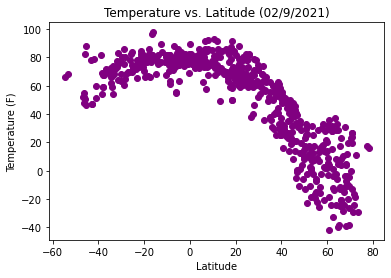

In [125]:
y = weather_df["Temperature(F)"]
x = weather_df["Latitude"]

plt.scatter(x,y, color="#800080")
plt.title("Temperature vs. Latitude (02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/TempVsLat.png")

print("The chart blow investigates the relationship between \nthe latitude of cities and their temperature at the \ntime of measurement.")

In [ ]:
## Humidity vs. Latitude Plot

The chart blow investigates the relationship between 
the latitude of cities and their humidity at the 
time of measurement.


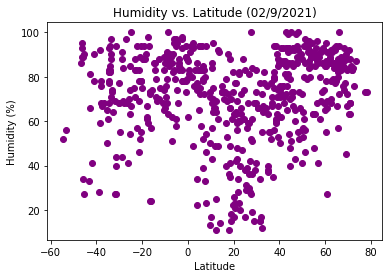

In [126]:
y = weather_df["Humidity(%)"]
x = weather_df["Latitude"]

plt.scatter(x,y, color="#800080")
plt.title("Humidity vs. Latitude (02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/HumidVsLat.png")

print("The chart blow investigates the relationship between \nthe latitude of cities and their humidity at the \ntime of measurement.")


## Cloudiness vs. Latitude Plot

The chart blow investigates the relationship between 
the latitude of cities and their cloudiness at the 
time of measurement.


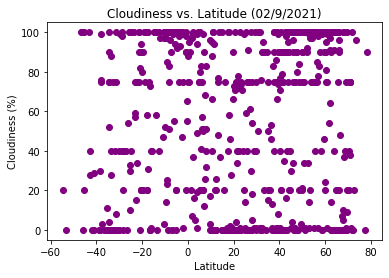

In [127]:
y = weather_df["Cloudiness(%)"]
x = weather_df["Latitude"]


plt.scatter(x,y, color="#800080")
plt.title("Cloudiness vs. Latitude (02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/CloudVsLat.png")

print("The chart blow investigates the relationship between \nthe latitude of cities and their cloudiness at the \ntime of measurement.")


## Wind Speed vs. Latitude Plot

The chart blow investigates the relationship between 
the latitude of cities and their wind speed at the 
time of measurement.


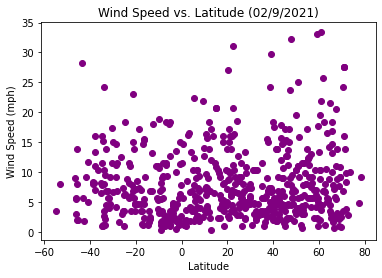

In [128]:
y = weather_df["Wind Speed(mph)"]
x = weather_df["Latitude"]

plt.scatter(x,y, color="#800080")
plt.title("Wind Speed vs. Latitude (02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/WindVsLat.png")

print("The chart blow investigates the relationship between \nthe latitude of cities and their wind speed at the \ntime of measurement.")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of northern hemisphere cities and their 
temperature at the time of measurement. The data suggests 
a strong correlation between the two factors wherin 
cities closer to the equator are generally hotter.

Correlation coefficent: -0.88


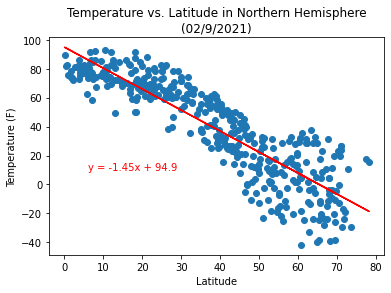

In [130]:
y = northern_df["Temperature(F)"]
x = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Temperature vs. Latitude in Northern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(6,10), fontsize=10, color="r")
plt.savefig("output_data/TempVsLatNorth.png")

print("The chart blow investigates the relationship between \nthe latitude of northern hemisphere cities and their \ntemperature at the time of measurement. The data suggests \na strong correlation between the two factors wherin \ncities closer to the equator are generally hotter.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of southern hemisphere cities and their 
temperature at the time of measurement. The data suggests 
a significant correlation between the two factors wherin 
cities closer to the equator are generally hotter, 
but with noticibly less consistency than northern 
hemisphere cities despite being, on average, much warmer.

Correlation coefficent: 0.51


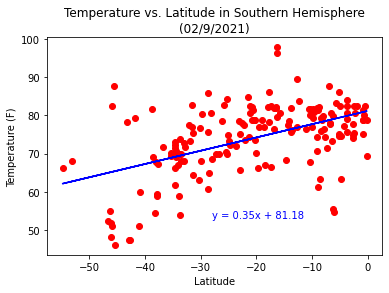

In [131]:
y = southern_df["Temperature(F)"]
x = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y, color="r")
plt.plot(x,regress_values,"b-")
plt.title("Temperature vs. Latitude in Southern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq,(-28,53), fontsize=10, color="b")
plt.savefig("output_data/TempVsLatSouth.png")

print("The chart blow investigates the relationship between \nthe latitude of southern hemisphere cities and their \ntemperature at the time of measurement. The data suggests \na significant correlation between the two factors wherin \ncities closer to the equator are generally hotter, \nbut with noticibly less consistency than northern \nhemisphere cities despite being, on average, much warmer.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of northern hemisphere cities and their 
humidity at the time of measurement. The data suggest 
a weak but noticeable correlation between the two factors 
wherin cities closer to the equator generally have a 
higher percent humidity as well as less variation in 
humity measurements.

Correlation coefficent: 0.35


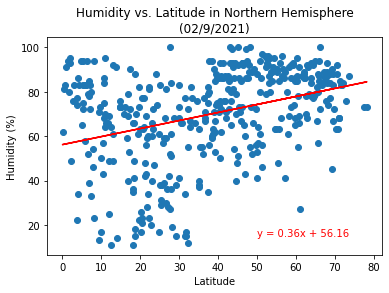

In [132]:
y = northern_df["Humidity(%)"]
x = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Humidity vs. Latitude in Northern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,15), fontsize=10, color="r")
plt.savefig("output_data/HumidVsLatNorth.png")

print("The chart blow investigates the relationship between \nthe latitude of northern hemisphere cities and their \nhumidity at the time of measurement. The data suggest \na weak but noticeable correlation between the two factors \nwherin cities closer to the equator generally have a \nhigher percent humidity as well as less variation in \nhumity measurements.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of southern hemisphere cities and their 
humidity at the time of measurement. The data suggest 
a weak but noticeable correlation between the two factors 
wherin cities closer to the equator generally have a 
higher percent humidity as well as less variation in 
humity measurements.

Correlation coefficent: 0.29


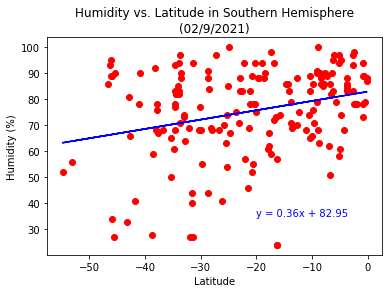

In [133]:
y = southern_df["Humidity(%)"]
x = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y, color="r")
plt.plot(x,regress_values,"b-")
plt.title("Humidity vs. Latitude in Southern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-20,35), fontsize=10, color="b")
plt.savefig("output_data/HumidVsLatSouth.png")

print("The chart blow investigates the relationship between \nthe latitude of southern hemisphere cities and their \nhumidity at the time of measurement. The data suggest \na weak but noticeable correlation between the two factors \nwherin cities closer to the equator generally have a \nhigher percent humidity as well as less variation in \nhumity measurements.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of northern hemisphere cities and their 
cloudiness at the time of measurement. The data suggest 
an inconcequential correlation between the two factors. 
The datapoints tend to congregate around extremes of 
0 or 100 percent cloudiness.

Correlation coefficent: 0.11


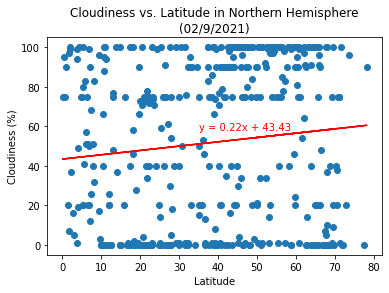

In [134]:
y = northern_df["Cloudiness(%)"]
x = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Cloudiness vs. Latitude in Northern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(35,58), fontsize=10, color="r")
plt.savefig("output_data/CloudVsLatNorth.png")

print("The chart blow investigates the relationship between \nthe latitude of northern hemisphere cities and their \ncloudiness at the time of measurement. The data suggest \nan inconcequential correlation between the two factors. \nThe datapoints tend to congregate around extremes of \n0 or 100 percent cloudiness.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of southern hemisphere cities and their 
cloudiness at the time of measurement. The data suggest 
a weak but noticeable correlation between the two 
factors wherin cities closer to the equator tend to be 
more cloudy. Still, the datapoints tend to congregate 
around extremes of 0 or 100 percent cloudiness.

Correlation coefficent: 0.32


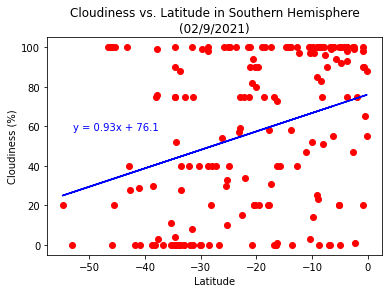

In [135]:
y = southern_df["Cloudiness(%)"]
x = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y, color="r")
plt.plot(x,regress_values,"b-")
plt.title("Cloudiness vs. Latitude in Southern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-53,58), fontsize=10, color="b")
plt.savefig("output_data/CloudVsLatSouth.png")

print("The chart blow investigates the relationship between \nthe latitude of southern hemisphere cities and their \ncloudiness at the time of measurement. The data suggest \na weak but noticeable correlation between the two \nfactors wherin cities closer to the equator tend to be \nmore cloudy. Still, the datapoints tend to congregate \naround extremes of 0 or 100 percent cloudiness.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of northern hemisphere cities and their 
wind speed at the time of measurement. The data suggest 
no meaningful correlation between the two factors with 
most cities having relatively low windspeeds regardless 
of their latitude.

Correlation coefficent: 0.07


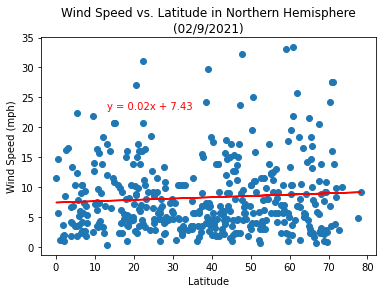

In [136]:
y = northern_df["Wind Speed(mph)"]
x = northern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.title("Wind Speed vs. Latitude in Northern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(13,23), fontsize=10, color="r")
plt.savefig("output_data/WindVsLatNorth.png")


print("The chart blow investigates the relationship between \nthe latitude of northern hemisphere cities and their \nwind speed at the time of measurement. The data suggest \nno meaningful correlation between the two factors with \nmost cities having relatively low windspeeds regardless \nof their latitude.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The chart blow investigates the relationship between 
the latitude of southern hemisphere cities and their 
wind speed at the time of measurement. The data suggest 
a greater correlation between the two factors than was 
present in northern hemisphere cities, but not so much 
greater as to gain any real significance. Most cities 
have relatively low windspeeds regardless of their 
latitude.

Correlation coefficent: -0.14


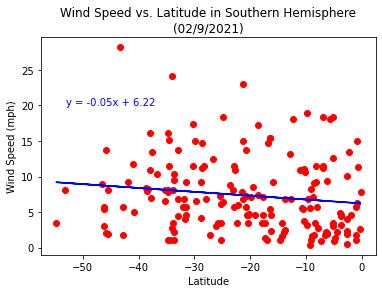

In [138]:
y = southern_df["Wind Speed(mph)"]
x = southern_df["Latitude"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y, color="r")
plt.plot(x,regress_values,"b-")
plt.title("Wind Speed vs. Latitude in Southern Hemisphere\n(02/9/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-53,20), fontsize=10, color="b")
plt.savefig("output_data/WindVsLatSouth.png")

print("The chart blow investigates the relationship between \nthe latitude of southern hemisphere cities and their \nwind speed at the time of measurement. The data suggest \na greater correlation between the two factors than was \npresent in northern hemisphere cities, but not so much \ngreater as to gain any real significance. Most cities \nhave relatively low windspeeds regardless of their \nlatitude.")
print("\nCorrelation coefficent: " + str(round((st.pearsonr(x,y))[0],2)))